In [40]:
import io
import re
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_params
from statsmodels.iolib.summary2 import summary_col

In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/mariasinellnikova/econometrica/main/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [42]:
df = df.replace(to_replace=['Male','Female'], value=[1,0])

In [43]:
df = df.replace(to_replace=['yes','no'], value=[1,0])

$$
charges = \beta_0 + \beta_1 * sex + \beta_2 * age
$$

In [44]:
model = smf.ols(formula = 'charges~sex+age', data=df).fit()
model.params.round(3)

Intercept      2343.625
sex[T.male]    1538.831
age             258.865
dtype: float64

$$
charges = 2343.625 + 1538.831 * sex + 258.865 * age
$$

1. При увеличении возраста на 1 единицу charges увеличивается на 258.865, при прочих равных
2. Если работающий человек - мужчина, то заработная плата увеличивается на 1538.831

<AxesSubplot:xlabel='age', ylabel='charges'>

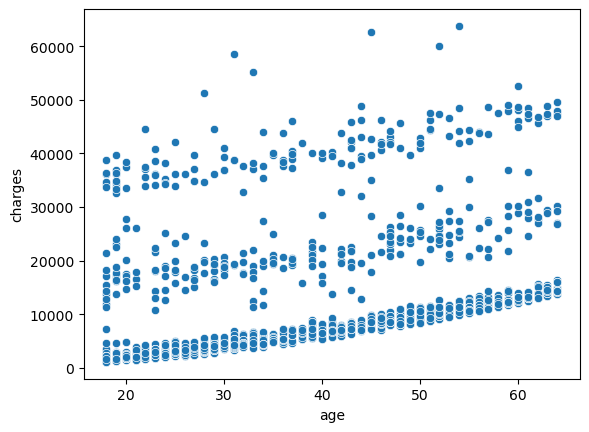

In [45]:
sns.scatterplot(data=df, y = 'charges', x = 'age')

<AxesSubplot:xlabel='age', ylabel='charges'>

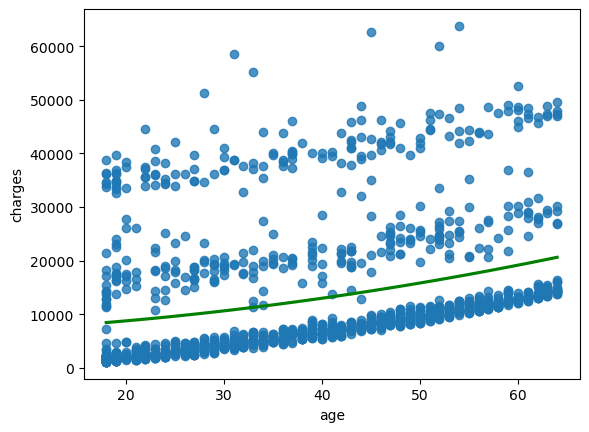

In [46]:
sns.regplot(data=df, y = 'charges', x = 'age', ci=None, order = 2, line_kws ={"color":"green"})

#### На основе полученной модели можно сделать вывод что, чем больше возраст человек, тем выше его charges

In [47]:
df['age^2']  = df['age']*df['age']
df

,age,sex,bmi,children,smoker,region,charges,age^2
0,19,female,27.900,0,1,southwest,16884.92400,361
1,18,male,33.770,1,0,southeast,1725.55230,324
2,28,male,33.000,3,0,southeast,4449.46200,784
3,33,male,22.705,0,0,northwest,21984.47061,1089
4,32,male,28.880,0,0,northwest,3866.85520,1024
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,2500
1334,18,female,31.920,0,0,northeast,2205.98080,324
1335,18,female,36.850,0,0,southeast,1629.83350,324
1336,21,female,25.800,0,0,southwest,2007.94500,441


$$
charges = \beta_0 + \beta_1 * sex + \beta_2 * age^2
$$

<AxesSubplot:xlabel='age^2', ylabel='charges'>

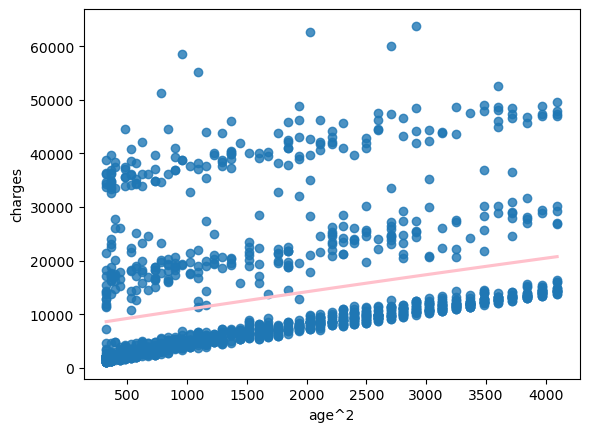

In [48]:
sns.regplot(data = df, y = 'charges', x = 'age^2', ci=None, order = 2, line_kws ={"color":"pink"})

#### Мы изменили зависимость с линейной на квадратическую
#### Итак, на данной модели можно наблюдать концентрацию значений наблюдений в начале координат, соответственно при использовании переменной второго порядка изменяется изгиб кривой (незначительно) и увеличивается точность предсказания. 

Перейдем к вычислению TSS, RSS, ESS

In [49]:
## TSS
model.centered_tss.round(3)

196074221568.367

#### TSS = 196074221568.367

In [50]:
## ESS
model.ess.round(3)

18321857664.839

#### ESS = 18321857664.839

In [51]:
## RSS
RSS = model.ssr.round(3)
RSS

177752363903.528

#### RSS = 177752363903.528

In [52]:
# R^2
model.rsquared.round(5)

0.09344

#### R^2 = 0.09344

### Так как значение коэффициента детерминации близко к 0, следовательно модель недостаточно точная

In [53]:
models = smf.ols(data=df, formula='charges~age+sex').fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     68.80
Date:                Tue, 23 May 2023   Prob (F-statistic):           3.64e-29
Time:                        13:31:14   Log-Likelihood:                -14412.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1335   BIC:                         2.885e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2343.6249    994.346      2.357      0.019     392.975    4294.275
sex[T.male]  1538.8314    631.084      2.438      0.015     300.807    2776.856
age           258.8651     22.466     11.523      0.000     214.793     302.937
==============================================================================
Omnibus:                      393.473   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              842.057
Skew:                           1.711   Prob(JB):                    1.41e-183
Kurtosis:                       4.842   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
models = smf.ols(data=df, formula='charges~age+sex').fit()
models.summary(alpha = 0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2343.6249,994.346,2.357,0.019,392.975,4294.275
sex[T.male],1538.8314,631.084,2.438,0.015,300.807,2776.856
age,258.8651,22.466,11.523,0.000,214.793,302.937


In [55]:
data_string = ''' coef std.err
Intercept    2343.6249 994.346
sex          1538.8314 631.084
age           258.8651 22.466'''

In [56]:
df = pd.read_csv(io.StringIO(data_string), sep='\s+')
df

,coef,std.err
Intercept,2343.6249,994.346
sex,1538.8314,631.084
age,258.8651,22.466


In [57]:
df['t_nabl'] = df['coef']/df['std.err']
df

,coef,std.err,t_nabl
Intercept,2343.6249,994.346,2.356951
sex,1538.8314,631.084,2.438394
age,258.8651,22.466,11.522527


In [58]:
t_cr = stats.t.ppf(1-0.05/2, 1338 - 3 - 1)
t_cr

1.9617438859517862

$$
t_{critical}=1.962
$$

In [59]:
df['Znachimosty'] = df.apply(lambda x: 'znachim' if np.abs(x['t_nabl']) >t_cr else 'ne znachim', axis = 1)
df

,coef,std.err,t_nabl,Znachimosty
Intercept,2343.6249,994.346,2.356951,znachim
sex,1538.8314,631.084,2.438394,znachim
age,258.8651,22.466,11.522527,znachim


 ##### коэффициенты Intercept, sex, age являются значимыми

## F-test

$$
H0: \beta_{charges}=\beta_{sex}=\beta_{age}=\beta_{region}=0
$$
$$
H1: \beta_{charges}^2+\beta_{sex}^2+\beta_{age}^2+\beta_{region}^2>0
$$

In [62]:
model = smf.ols(formula = 'charges~sex+age+region', data=df).fit()
model.params.round(3)

Intercept              2452.036
sex[T.male]            1504.988
region[T.northwest]    -958.626
region[T.southeast]    1390.153
region[T.southwest]   -1105.643
age                     259.679
dtype: float64

In [63]:
# RSS 
RSS2 = model.ssr.round(3)
RSS2

176373850650.023

In [64]:
# TSS 
TSS2 = model.centered_tss.round(3)
TSS2

196074221568.367

In [65]:
#R^2 
R2_2 = RSS2/TSS2
R2_2

0.8995259511384831

In [66]:
unrest, rest = np.float_(re.findall(r'([-+]?\d+.\d+)','R2                      0.576          0.98'))
print (unrest, rest)

0.576 0.98


In [67]:
F_obs = (unrest - rest)/(1-unrest)*(5000 - 13)/4
F_obs

-1187.941037735849

In [68]:
alpha = 0.05
F_cr = stats.f.ppf(1-alpha, 4, 5000-13)
F_cr

2.373713672224553

$$
F_{obs}<F{cr}; 
$$

Вывод:Данные согласуются с гипотезорй Н0

## Доверительные интервалы

In [69]:
models = smf.ols(data=df, formula='charges~age+sex').fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     68.80
Date:                Tue, 23 May 2023   Prob (F-statistic):           3.64e-29
Time:                        13:32:39   Log-Likelihood:                -14412.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1335   BIC:                         2.885e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2343.6249    994.346      2.357      0.019     392.975    4294.275
sex[T.male]  1538.8314    631.084      2.438      0.015     300.807    2776.856
age           258.8651     22.466     11.523      0.000     214.793     302.937
==============================================================================
Omnibus:                      393.473   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              842.057
Skew:                           1.711   Prob(JB):                    1.41e-183
Kurtosis:                       4.842   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
df_table = pd.read_html(model.summary().tables[1].as_html(), header = 0, index_col = 0)[0]
df_table

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2452.0357,1137.800,2.155,0.031,219.960,4684.111
sex[T.male],1504.9883,629.440,2.391,0.017,270.187,2739.790
region[T.northwest],-958.6262,903.400,-1.061,0.289,-2730.868,813.616
region[T.southeast],1390.1534,878.981,1.582,0.114,-334.184,3114.491
region[T.southwest],-1105.6427,903.396,-1.224,0.221,-2877.876,666.591
age,259.6790,22.406,11.590,0.000,215.725,303.633


In [71]:
alpha = 0.05

In [72]:
nobs = model.nobs
regr_cnt = model.df_model + 1
t_cr = stats.t.ppf(1-alpha/2, nobs - regr_cnt)

In [73]:
regr_cnt

6.0

In [74]:
nobs

1338.0

In [75]:
t_cr

1.9617465608647315

In [76]:
#количество регрессоров + 1 = 6
#количество наблюдений = 1338
#критическое значение = 1.962
#уровень значимости 5%

In [77]:
df_table['lower'] = (df_table['coef'].astype(float) - df_table['std err'].astype(float)*t_cr).round(2)
df_table['upper'] = (df_table['coef'].astype(float) + df_table['std err'].astype(float)*t_cr).round(2)
df_table

,coef,std err,t,P>|t|,[0.025,0.975],lower,upper
Intercept,2452.0357,1137.800,2.155,0.031,219.960,4684.111,219.96,4684.11
sex[T.male],1504.9883,629.440,2.391,0.017,270.187,2739.790,270.19,2739.79
region[T.northwest],-958.6262,903.400,-1.061,0.289,-2730.868,813.616,-2730.87,813.62
region[T.southeast],1390.1534,878.981,1.582,0.114,-334.184,3114.491,-334.18,3114.49
region[T.southwest],-1105.6427,903.396,-1.224,0.221,-2877.876,666.591,-2877.88,666.59
age,259.6790,22.406,11.590,0.000,215.725,303.633,215.72,303.63


## Мультиколлинеарность

In [81]:
model__0 = smf.ols(data = df , formula = 'charges~age+bmi+children').fit()
model__1 = smf.ols(data = df , formula = 'age~bmi+children').fit()
model__2 = smf.ols(data = df , formula = 'children~age+bmi').fit()
model__1.params.round(3)

Intercept    31.000
bmi           0.251
children      0.479
dtype: float64

In [82]:
model__1.rsquared

0.013627758762780773

In [83]:
VIF_1 = 1/(1 - model__1.rsquared.round(3))
VIF_1.round(2)

1.01

In [84]:
VIF_2 = 1/(1 - model__2.rsquared.round(3))
VIF_2.round(2)

1.0

## Дамми-переменные

$$
Н0: \beta_{charges}=\beta_{age}=\beta_{region}=\beta{sex}=0
$$
$$
H1: \beta_{charges}^2+\beta_{age}^2+\beta_{region}^2+\beta{sex}^2>0
$$

In [85]:
data_string = '''R2                      0.09344          0.899  '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', data_string)) 

In [86]:
F_obs = (unrest - rest)/(1-unrest)*(935-10)/5
F_obs.round(2)

1475.53

In [87]:
alpha = 0.05 
F_cr = stats.f.ppf(1-alpha,4,706-8)
F_cr

2.384692685857469

$$
F_{obs}>F_{cr}
$$

=> Не принимаем гипоезу H0

## Гетероскедастичность

In [88]:
df['res2']=model.resid**2
df['res']=model.resid

In [89]:
 sub_model= smf.ols(data=df, formula='res2~age+charges+children').fit()

$$
H0:\gamma_{1}=\gamma_{2}=\gamma_{3}=0
$$
$$
H1:\gamma_{1}^2+\gamma_{2}^2+\gamma_{3}^2>0
$$

In [90]:
St = np.round(len(df)*sub_model.rsquared,2)
St

1024.49

In [91]:
Hi2 = stats.chi2.ppf(1-0.05,6)
Hi2

12.591587243743977

$$
Тест указывает на гетероскедастичность

$$
Отвергаем гипотезу Н0


## Серийная корреляция

In [92]:
model.resid

0       10604.629977
1       -8295.847110
2       -8168.727408
3       10416.665755
4       -7441.270655
            ...     
1333    -5381.799553
1334    -4920.276904
1335    -6886.577573
1336    -4791.707023
1337    11807.531785
Length: 1338, dtype: float64

In [93]:
resSq = sum(model.resid**2)

In [94]:
sum_resid = 0
for i in range(len(model.resid)-1):
    sum_resid+=(model.resid[i+1]-model.resid[i])**2
sum_resid

360035638066.596


$$
H0:p = 0
$$
$$
H1:p ≠ 0
$$

In [95]:
sum_resid/resSq

2.0413209596529733

In [ ]:
Гипотеза Н0 отвергается